In [1]:
import pandas as pd
import numpy as np
import sklearn 
from matplotlib import pyplot as p
%matplotlib inline

In [2]:
df = pd.read_csv('data/Hackaviz2020/par_origines.csv', parse_dates=['date'])

In [3]:
df.dtypes

date            datetime64[ns]
org                     object
dest                     int64
volume                   int64
vacances_org             int64
Temp_midi                int64
meteo                    int64
nb_evt                   int64
dtype: object

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
_ = df.groupby("date").count()
_.sort_values('org')

,org,dest,volume,vacances_org,Temp_midi,meteo,nb_evt
date,,,,,,,
2018-08-29,630,630,630,630,630,630,630
2018-12-03,973,973,973,973,973,973,973
2018-05-21,1197,1197,1197,1197,1197,1197,1197
2018-05-20,1245,1245,1245,1245,1245,1245,1245
2018-03-15,1260,1260,1260,1260,1260,1260,1260
...,...,...,...,...,...,...,...
2018-12-27,1390,1390,1390,1390,1390,1390,1390
2018-12-30,1391,1391,1391,1391,1391,1391,1391
2018-12-26,1391,1391,1391,1391,1391,1391,1391


Drop 2018-08-29 and 2018-12-03 as they are missing a lot of values.

In [6]:
df = df.loc[(df.date != '2018-08-29') & (df.date != '2018-12-03'), :]

In [7]:
df['month'] = pd.DatetimeIndex(df.date).month
df['fra'] = df.org.str.isdigit()

In [8]:
_ = df.groupby(['month','org','dest']).agg('mean')
df = _.reset_index()
df['volume_fra'] = df.volume * df.fra
df['volume_etr'] = df.volume * (df.fra == False)
df

,month,org,dest,volume,vacances_org,Temp_midi,meteo,nb_evt,fra,volume_fra,volume_etr
0,1,01,9,61.363636,0.272727,10.545455,0.909091,0.000000,True,61.363636,0.000000
1,1,01,11,96.709677,0.225806,11.709677,1.290323,0.838710,True,96.709677,0.000000
2,1,01,12,30.866667,0.233333,8.033333,0.400000,0.000000,True,30.866667,0.000000
3,1,01,30,268.935484,0.225806,10.838710,0.935484,0.290323,True,268.935484,0.000000
4,1,01,31,222.516129,0.225806,10.483871,0.709677,0.000000,True,222.516129,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
16666,12,US,48,2.266667,2.000000,6.633333,0.133333,0.000000,False,0.000000,2.266667
16667,12,US,65,60.933333,2.000000,10.466667,0.800000,0.000000,False,0.000000,60.933333
16668,12,US,66,91.933333,2.000000,12.866667,1.500000,1.000000,False,0.000000,91.933333
16669,12,US,81,75.100000,2.000000,9.233333,0.566667,0.000000,False,0.000000,75.100000


In [9]:
_ = df.groupby(['month', 'dest']).agg({'volume': 'sum', 'Temp_midi': 'mean', 'meteo': 'mean', 'nb_evt': 'mean', 'volume_fra': 'sum', 'volume_etr': 'sum'})
df = _.reset_index()
df

,month,dest,volume,Temp_midi,meteo,nb_evt,volume_fra,volume_etr
0,1,9,9765.317924,9.913460,0.616074,0.000000,7340.576540,2424.741384
1,1,11,17240.032184,11.738034,1.293761,0.829744,8741.463904,8498.568280
2,1,12,8743.749873,8.142423,0.393311,0.000000,6306.104711,2437.645161
3,1,30,26900.361898,10.835931,0.934594,0.289513,13765.845769,13134.516129
4,1,31,60622.322581,10.483871,0.709677,0.000000,29814.612903,30807.709677
...,...,...,...,...,...,...,...,...
151,12,48,5532.973079,6.651996,0.136055,0.000000,4129.773079,1403.200000
152,12,65,23049.308513,10.450568,0.798575,0.000000,17784.275180,5265.033333
153,12,66,53820.866667,12.865201,1.499228,1.000000,26667.800000,27153.066667
154,12,81,16131.704981,9.238241,0.566613,0.000000,10368.138314,5763.566667


In [10]:
df_capacites = pd.read_csv('data/Hackaviz2020/capacites.csv')
df_capacites = df_capacites.loc[:,['dpt', 'nom_dpt', 'pop_dpt', 'Hbgt_total']]
df_capacites

,dpt,nom_dpt,pop_dpt,Hbgt_total
0,9,Ariege,152611,10634
1,11,Aude,368323,75753
2,12,Aveyron,278217,64952
3,30,Gard,744958,97793
4,31,Haute-Garonne,1376737,48332
5,32,Gers,189824,29918
6,34,Herault,1155017,216870
7,46,Lot,172296,60279
8,48,Lozere,75949,26512
9,65,Hautes-Pyrenees,226210,84641


In [11]:
df = pd.merge(df, df_capacites, left_on='dest', right_on='dpt')
df

,month,dest,volume,Temp_midi,meteo,nb_evt,volume_fra,volume_etr,dpt,nom_dpt,pop_dpt,Hbgt_total
0,1,9,9765.317924,9.913460,0.616074,0.000000,7340.576540,2424.741384,9,Ariege,152611,10634
1,2,9,12872.991467,4.700157,0.153207,0.000000,10524.610281,2348.381186,9,Ariege,152611,10634
2,3,9,11560.395547,9.938168,0.802730,0.292021,8156.820893,3403.574654,9,Ariege,152611,10634
3,4,9,10119.644636,16.454710,2.304313,1.074508,7627.422912,2492.221724,9,Ariege,152611,10634
4,5,9,10068.101234,16.663871,2.139274,1.000000,7150.112985,2917.988249,9,Ariege,152611,10634
...,...,...,...,...,...,...,...,...,...,...,...,...
151,8,82,29002.433333,27.666667,3.433333,0.166667,14560.800000,14441.633333,82,Tarn-et-Garonne,260118,8947
152,9,82,18370.966667,25.695062,3.533025,0.000000,6686.000000,11684.966667,82,Tarn-et-Garonne,260118,8947
153,10,82,16137.322581,18.317396,2.520609,0.000000,5966.483871,10170.838710,82,Tarn-et-Garonne,260118,8947
154,11,82,12990.533333,13.794444,1.732099,0.000000,4324.966667,8665.566667,82,Tarn-et-Garonne,260118,8947


In [12]:
df['volume_sur_pop'] = df['volume'] / df['pop_dpt']
df['volume_sur_hbgt'] = df['volume'] / df['Hbgt_total']
df['frac_internationale'] = df['volume_etr'] / df['volume']
df

,month,dest,volume,Temp_midi,meteo,nb_evt,volume_fra,volume_etr,dpt,nom_dpt,pop_dpt,Hbgt_total,volume_sur_pop,volume_sur_hbgt,frac_internationale
0,1,9,9765.317924,9.913460,0.616074,0.000000,7340.576540,2424.741384,9,Ariege,152611,10634,0.063988,0.918311,0.248301
1,2,9,12872.991467,4.700157,0.153207,0.000000,10524.610281,2348.381186,9,Ariege,152611,10634,0.084352,1.210550,0.182427
2,3,9,11560.395547,9.938168,0.802730,0.292021,8156.820893,3403.574654,9,Ariege,152611,10634,0.075751,1.087116,0.294417
3,4,9,10119.644636,16.454710,2.304313,1.074508,7627.422912,2492.221724,9,Ariege,152611,10634,0.066310,0.951631,0.246276
4,5,9,10068.101234,16.663871,2.139274,1.000000,7150.112985,2917.988249,9,Ariege,152611,10634,0.065972,0.946784,0.289825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,8,82,29002.433333,27.666667,3.433333,0.166667,14560.800000,14441.633333,82,Tarn-et-Garonne,260118,8947,0.111497,3.241582,0.497946
152,9,82,18370.966667,25.695062,3.533025,0.000000,6686.000000,11684.966667,82,Tarn-et-Garonne,260118,8947,0.070626,2.053310,0.636056
153,10,82,16137.322581,18.317396,2.520609,0.000000,5966.483871,10170.838710,82,Tarn-et-Garonne,260118,8947,0.062038,1.803657,0.630268
154,11,82,12990.533333,13.794444,1.732099,0.000000,4324.966667,8665.566667,82,Tarn-et-Garonne,260118,8947,0.049941,1.451943,0.667068


In [13]:
df = df[['dpt', 
          'nom_dpt', 
          'pop_dpt', 
          'month', 
          'volume', 
          'volume_sur_pop', 
          'volume_sur_hbgt', 
          'frac_internationale', 
          'Temp_midi', 
          'meteo', 
          'nb_evt'
         ]]
df

,dpt,nom_dpt,pop_dpt,month,volume,volume_sur_pop,volume_sur_hbgt,frac_internationale,Temp_midi,meteo,nb_evt
0,9,Ariege,152611,1,9765.317924,0.063988,0.918311,0.248301,9.913460,0.616074,0.000000
1,9,Ariege,152611,2,12872.991467,0.084352,1.210550,0.182427,4.700157,0.153207,0.000000
2,9,Ariege,152611,3,11560.395547,0.075751,1.087116,0.294417,9.938168,0.802730,0.292021
3,9,Ariege,152611,4,10119.644636,0.066310,0.951631,0.246276,16.454710,2.304313,1.074508
4,9,Ariege,152611,5,10068.101234,0.065972,0.946784,0.289825,16.663871,2.139274,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
151,82,Tarn-et-Garonne,260118,8,29002.433333,0.111497,3.241582,0.497946,27.666667,3.433333,0.166667
152,82,Tarn-et-Garonne,260118,9,18370.966667,0.070626,2.053310,0.636056,25.695062,3.533025,0.000000
153,82,Tarn-et-Garonne,260118,10,16137.322581,0.062038,1.803657,0.630268,18.317396,2.520609,0.000000
154,82,Tarn-et-Garonne,260118,11,12990.533333,0.049941,1.451943,0.667068,13.794444,1.732099,0.000000


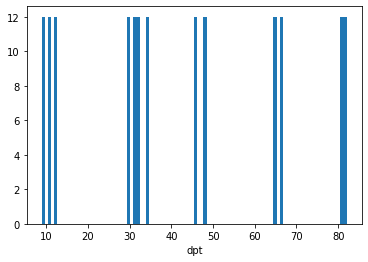

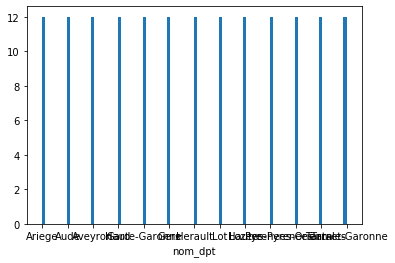

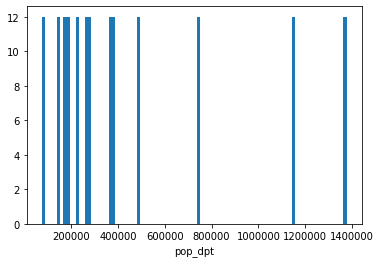

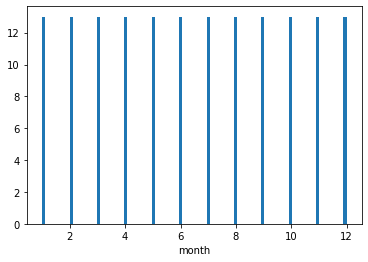

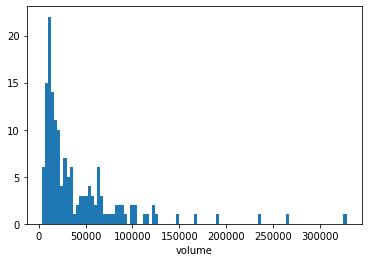

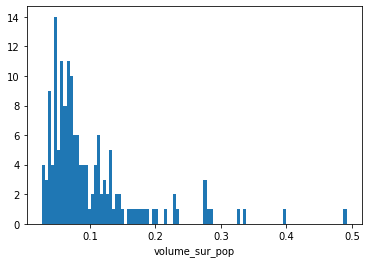

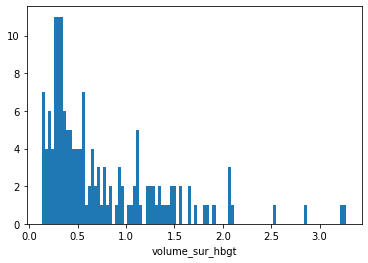

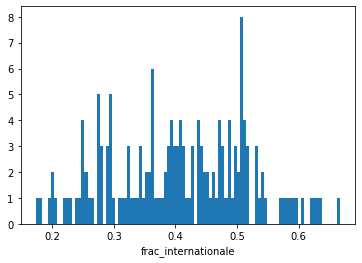

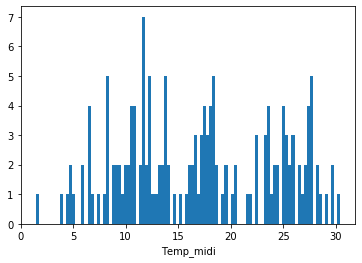

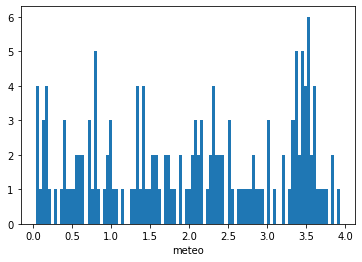

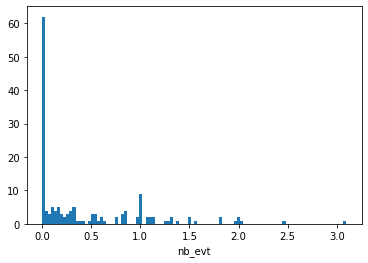

In [14]:
for col in df.columns:
    p.figure()
    p.hist(df[col], bins=100);
    p.xlabel(col)

In [15]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# cols = [
#         'volume', 
#         'volume_sur_pop',
#         'volume_sur_hbgt', 
#         'frac_internationale', 
#         'Temp_midi', 
#         'meteo',
#         'nb_evt'
#         ]

# # num = df[cols]
# # scaler.fit(num)
# # num = np.transpose(scaler.transform(num))
# for i,col in enumerate(cols):
#     df[col+'_std'] = df[col] - df[col].min()
#     df[col+'_std']-= df[col+'_std'].max()/2.
#     df[col+'_std']/= df[col+'_std'].max()
# df

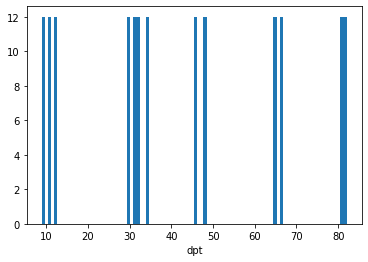

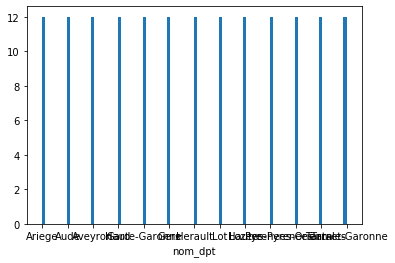

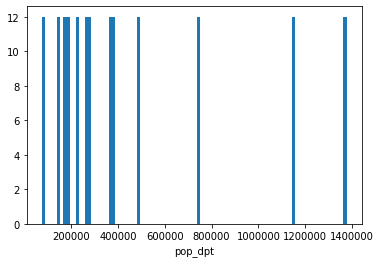

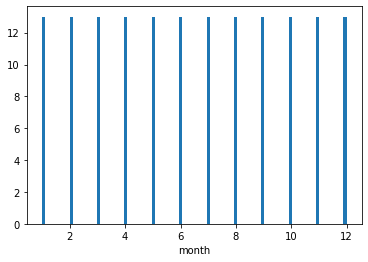

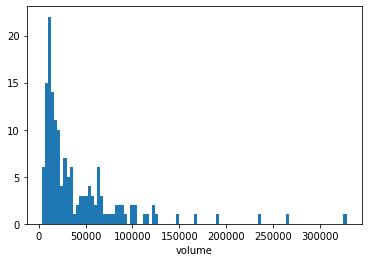

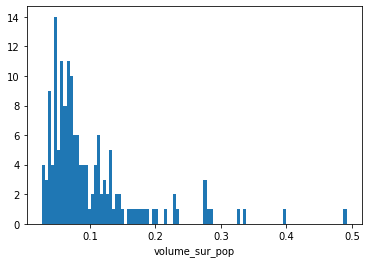

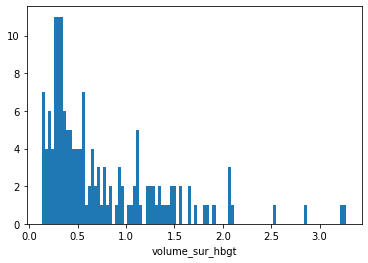

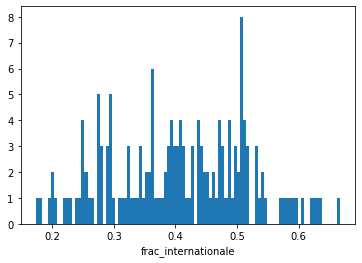

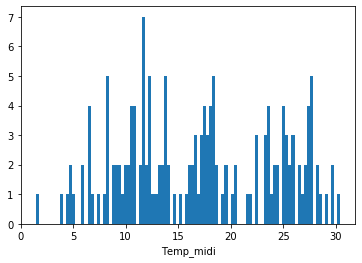

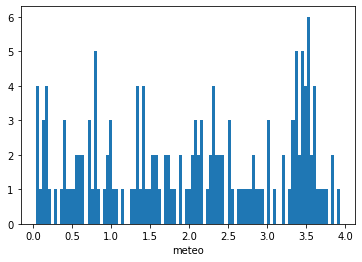

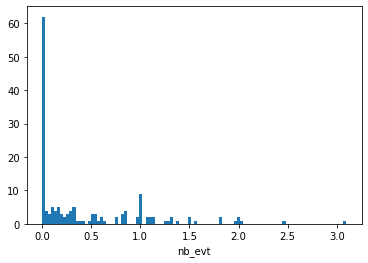

In [16]:
for col in df.columns:
    p.figure()
    p.hist(df[col], bins=100);
    p.xlabel(col)

In [17]:
import geojson
with open('data/capacites.geojson') as f:
    geo = geojson.load(f)

In [18]:
geo.keys()

dict_keys(['type', 'name', 'crs', 'features'])

In [19]:
df.to_csv('data/map_data.csv')
df.to_json('data/map_data.json')

In [27]:
features = []

for i,dept in enumerate(geo.features):
    d = {}
    d["type"] = "Feature"
    d["geometry"] = dept.geometry
    
    d_prop = {}
    d_prop['INSEE_DEP'] = dept.properties['INSEE_DEP']
    d_prop['nom_dpt'] = dept.properties['nom_dpt']
    
    _ = df[df.dpt == int(dept.properties['INSEE_DEP'])].sort_values('month')
    data = []
    for i in range(len(_)):
        idd = _.iloc[i].to_dict()
        for col in _.columns:
            idd[col+'_max'] = df[df.month == idd['month']][col].max()
            idd[col+'_min'] = df[df.month == idd['month']][col].min()
        data.append(idd) 

    d_prop['data'] = data
    
    d["properties"] = d_prop
    
    features.append(d)

In [28]:
d = {
        "type": "FeatureCollection",
        "features": features
}

In [29]:
d

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {"coordinates": [[[[1.688, 43.274], [1.724, 43.224], [1.71, 43.19], [1.827, 43.145], [1.95, 43.118], [1.986, 43.024], [1.987, 42.871], [1.876, 42.853], [1.89, 42.811], [1.951, 42.737], [2.008, 42.734], [2.056, 42.756], [2.168, 42.696], [2.166, 42.664], [2.001, 42.661], [1.965, 42.616], [1.862, 42.581], [1.786, 42.574], [1.736, 42.615], [1.598, 42.628], [1.55, 42.655], [1.501, 42.645], [1.439, 42.603], [1.414, 42.654], [1.357, 42.719], [1.167, 42.709], [1.103, 42.773], [0.961, 42.806], [0.931, 42.789], [0.858, 42.826], [0.826, 42.914], [0.907, 42.958], [0.979, 42.974], [1.011, 43.014], [0.981, 43.074], [1.059, 43.141], [1.175, 43.141], [1.224, 43.086], [1.291, 43.124], [1.22, 43.153], [1.235, 43.189], [1.325, 43.192], [1.375, 43.214], [1.319, 43.252], [1.305, 43.298], [1.346, 43.316], [1.467, 43.209], [1.517, 43.271], [1.637, 43.255], [1.688, 43.274]]]], "type": "MultiPolygon"},
   'properties': {'INSEE_DEP':

In [36]:
import json

class MyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(MyEncoder, self).default(obj)
        

with open("data/map_data.geojson", 'w') as f:
    json.dump(d, f, cls=MyEncoder)


In [35]:
d['features']

[{'type': 'Feature',
  'geometry': {"coordinates": [[[[1.688, 43.274], [1.724, 43.224], [1.71, 43.19], [1.827, 43.145], [1.95, 43.118], [1.986, 43.024], [1.987, 42.871], [1.876, 42.853], [1.89, 42.811], [1.951, 42.737], [2.008, 42.734], [2.056, 42.756], [2.168, 42.696], [2.166, 42.664], [2.001, 42.661], [1.965, 42.616], [1.862, 42.581], [1.786, 42.574], [1.736, 42.615], [1.598, 42.628], [1.55, 42.655], [1.501, 42.645], [1.439, 42.603], [1.414, 42.654], [1.357, 42.719], [1.167, 42.709], [1.103, 42.773], [0.961, 42.806], [0.931, 42.789], [0.858, 42.826], [0.826, 42.914], [0.907, 42.958], [0.979, 42.974], [1.011, 43.014], [0.981, 43.074], [1.059, 43.141], [1.175, 43.141], [1.224, 43.086], [1.291, 43.124], [1.22, 43.153], [1.235, 43.189], [1.325, 43.192], [1.375, 43.214], [1.319, 43.252], [1.305, 43.298], [1.346, 43.316], [1.467, 43.209], [1.517, 43.271], [1.637, 43.255], [1.688, 43.274]]]], "type": "MultiPolygon"},
  'properties': {'INSEE_DEP': '09',
   'nom_dpt': 'Ariège',
   'data': [{'

In [31]:
_ = df[df.month==2]
_['volume_std'] = (2*_.volume - _.volume.max() - _.volume.min()) / (_.volume.max() - _.volume.min())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


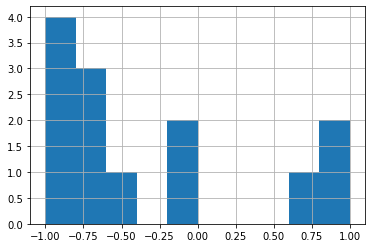

In [32]:
_['volume_std'].hist()

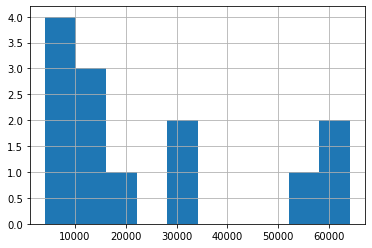

In [33]:
_.volume.hist()

In [34]:
d['features'][0]['properties']['data'][0]

{'dpt': 9,
 'nom_dpt': 'Ariege',
 'pop_dpt': 152611,
 'month': 1,
 'volume': 9765.317924219802,
 'volume_sur_pop': 0.06398829654625028,
 'volume_sur_hbgt': 0.9183108824731806,
 'frac_internationale': 0.24830132548113393,
 'Temp_midi': 9.913459607833328,
 'meteo': 0.6160740160197837,
 'nb_evt': 0.0,
 'dpt_max': 82,
 'dpt_min': 9,
 'nom_dpt_max': 'Tarn-et-Garonne',
 'nom_dpt_min': 'Ariege',
 'pop_dpt_max': 1376737,
 'pop_dpt_min': 75949,
 'month_max': 1,
 'month_min': 1,
 'volume_max': 60622.32258064515,
 'volume_min': 3613.3991561083267,
 'volume_sur_pop_max': 0.08438646042656002,
 'volume_sur_pop_min': 0.02721069919492647,
 'volume_sur_hbgt_max': 1.2542895510354455,
 'volume_sur_hbgt_min': 0.13461863949796093,
 'frac_internationale_max': 0.5484135507988445,
 'frac_internationale_min': 0.19583948933206669,
 'Temp_midi_max': 12.096774193548384,
 'Temp_midi_min': 5.192063898081024,
 'meteo_max': 1.4193548387096768,
 'meteo_min': 0.05987219007043601,
 'nb_evt_max': 0.8297443492650008,
 'nb

In [ ]:
_.volume.max()